In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
# define euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [3]:
# define knn function
def knn_predict(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = []
        for i, train_point in enumerate(x_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = [dist[1] for dist in distances[:k]]
        majority_vote = max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)
        y_pred.append(majority_vote)
    return np.array(y_pred)

In [4]:
# define accuracy function 
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

In [5]:
# create the artificial dataset 

# generates a 500 sample data set with 3 features, 6 centers, and a cluster standard deviation of 1.5
np.random.seed(3)
centers = np.array([[1, 1, 1], [5, 5, 5], [9, 9, 9], [1, 9, 1], [9, 1, 9], [5, 1, 5]])
num_samples = 500
cluster_std = 1.5
x = []
y = []
for i, center in enumerate(centers):
    x.append(np.random.normal(loc=center, scale=cluster_std, size=(num_samples // 6, 3)))
    y.append(np.full(num_samples // 6, i))
x = np.vstack(x)
y = np.hstack(y)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (498, 3)
y shape: (498,)


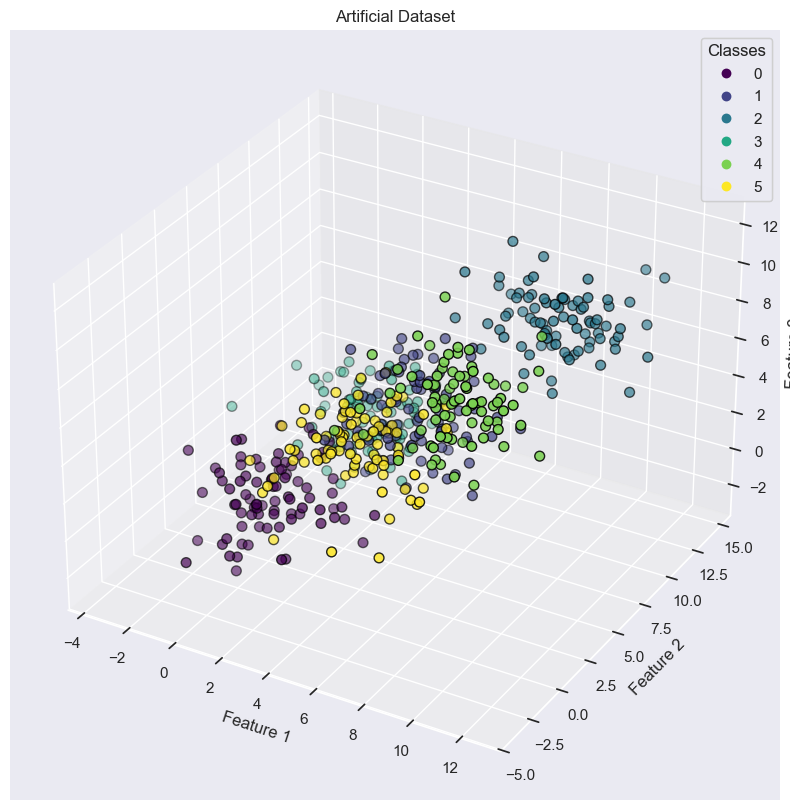

In [6]:
# visualize the data using matplotlib

sns.set_theme('notebook')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap='viridis', s=50, edgecolors='black')

# Add labels
ax.set_title('Artificial Dataset')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

In [7]:
# split the data into training and testing sets
# 80% of the data will be used for training and 20% will be used for testing

np.random.seed(0)

# Shuffle the data
indices = np.arange(x.shape[0])
np.random.shuffle(indices)
x_shuffled = x[indices]
y_shuffled = y[indices]

# Split the data
split_index = int(0.8 * x.shape[0])
x_train = x_shuffled[:split_index]
y_train = y_shuffled[:split_index]
x_test = x_shuffled[split_index:]
y_test = y_shuffled[split_index:]

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (398, 3)
y_train shape: (398,)
x_test shape: (100, 3)
y_test shape: (100,)


In [8]:
# train the KNN model
knn5 = knn_predict(x_train, y_train, x_test, k=5)
knn10 = knn_predict(x_train, y_train, x_test, k=10)
knn1 = knn_predict(x_train, y_train, x_test, k=1)
knn100 = knn_predict(x_train, y_train, x_test, k=100)

In [9]:
# accuracy score
accuracy_knn1 = calculate_accuracy(y_test, knn1)
accuracy_knn5 = calculate_accuracy(y_test, knn5)
accuracy_knn10 = calculate_accuracy(y_test, knn10)
accuracy_knn100 = calculate_accuracy(y_test, knn100)

print(f"Accuracy for k=1: {accuracy_knn1:.2f}")
print(f"Accuracy for k=5: {accuracy_knn5:.2f}")
print(f"Accuracy for k=10: {accuracy_knn10:.2f}")
print(f"Accuracy for k=100: {accuracy_knn100:.2f}")

Accuracy for k=1: 0.86
Accuracy for k=5: 0.90
Accuracy for k=10: 0.89
Accuracy for k=100: 0.91


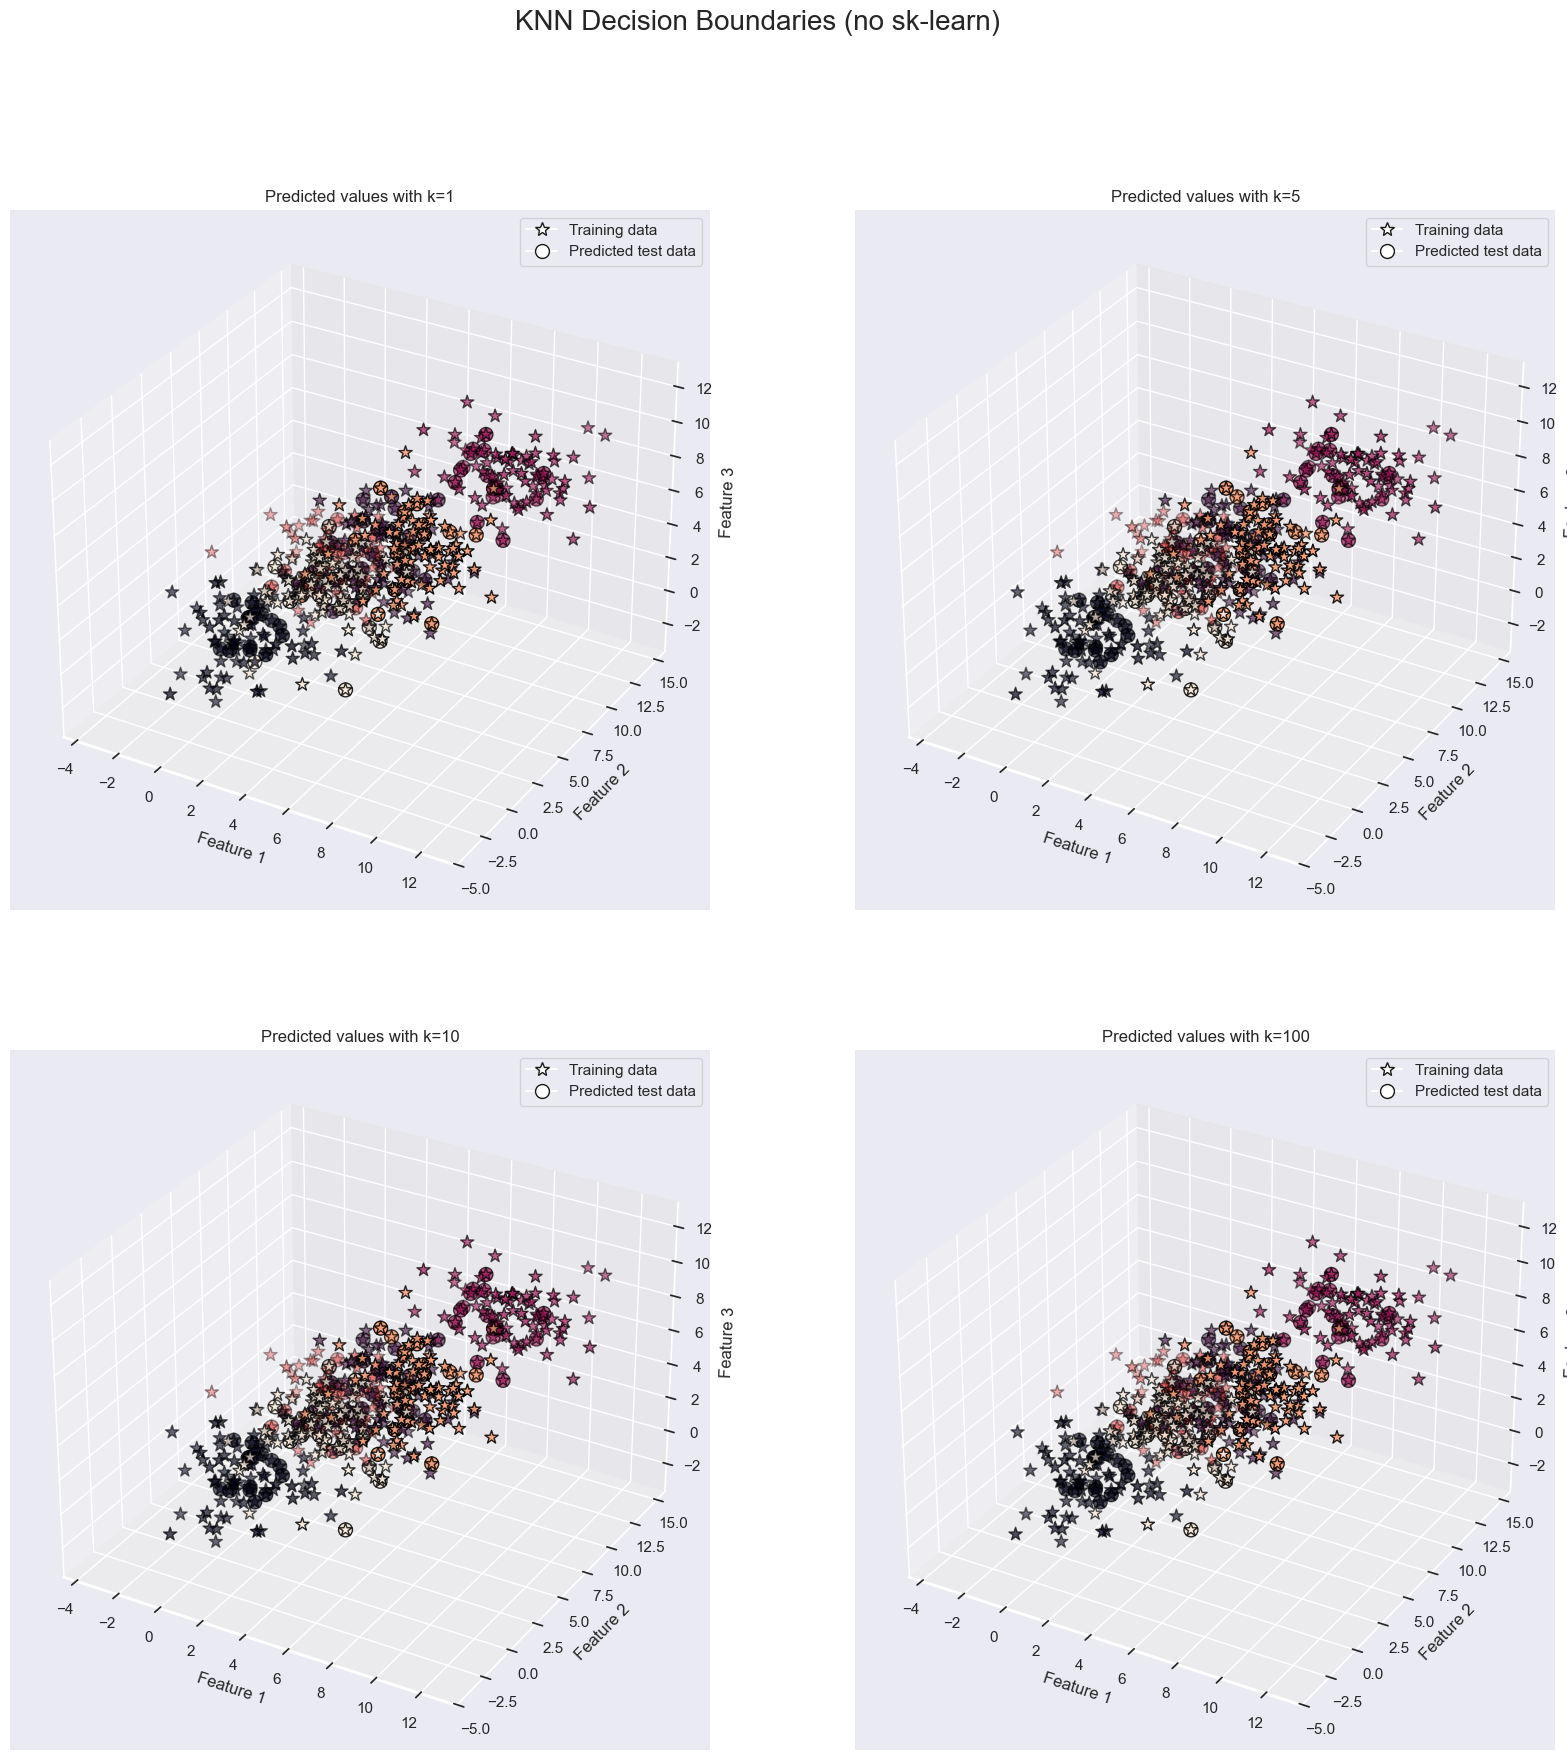

In [10]:
# Create the figure
sns.set_theme('notebook')
fig = plt.figure(figsize=(20, 20))
fig_title = fig.suptitle('KNN Decision Boundaries (no sk-learn)', fontsize=20)

# Plot k = 1
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_title('Predicted values with k=1')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
train_plot1 = ax1.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot1 = ax1.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=knn1, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Plot k = 5
ax2 = fig.add_subplot(222, projection='3d')
ax2.set_title('Predicted values with k=5')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
train_plot2 = ax2.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot2 = ax2.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=knn5, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Plot k = 10
ax3 = fig.add_subplot(223, projection='3d')
ax3.set_title('Predicted values with k=10')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')
train_plot3 = ax3.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot3 = ax3.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=knn10, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Plot k = 100
ax4 = fig.add_subplot(224, projection='3d')
ax4.set_title('Predicted values with k=100')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')
ax4.set_zlabel('Feature 3')
train_plot4 = ax4.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot4 = ax4.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=knn100, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Create custom legends
custom_lines = [
    Line2D([0], [0], marker='*', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='Training data'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='Predicted test data')
]

# Add legends
ax1.legend(handles=custom_lines, loc='best')
ax2.legend(handles=custom_lines, loc='best')
ax3.legend(handles=custom_lines, loc='best')
ax4.legend(handles=custom_lines, loc='best')

# Show the plots
plt.show()